In [1]:
##### import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import pyrsm as rsm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv("amazon_baby.csv")
df.shape

(183531, 3)

In [3]:
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [4]:
# Classify the rating to different sentiment level. 
# df['sentiment']=rsm.ifelse(df.rating>=4,'positive',rsm.ifelse(df.rating==3,'neutual','negative'))
# df.head()

In [5]:
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [6]:
# Drop rows with Null value
df = df.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)
df.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [7]:
df.shape

(182384, 3)

In [8]:
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


<AxesSubplot:>

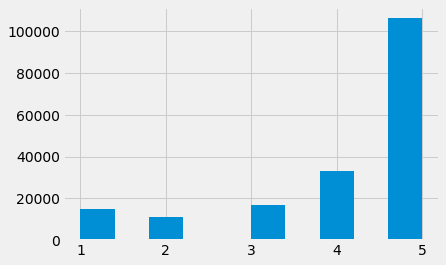

In [9]:
df['rating'].hist()

In [10]:
stopwords = set(STOPWORDS)

In [11]:
text = " ".join(str(review) for review in df.review)

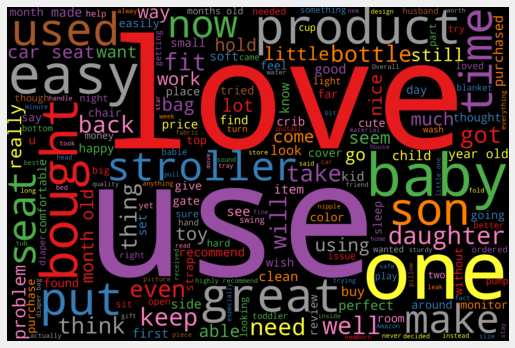

In [12]:
wordcloud = WordCloud(stopwords=stopwords,width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set1').generate(text)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
positive_df = df[(df.rating == 5) | (df.rating == 4)]
len(positive_df)

139318

In [14]:
text_positive = " ".join(str(review) for review in positive_df.review)

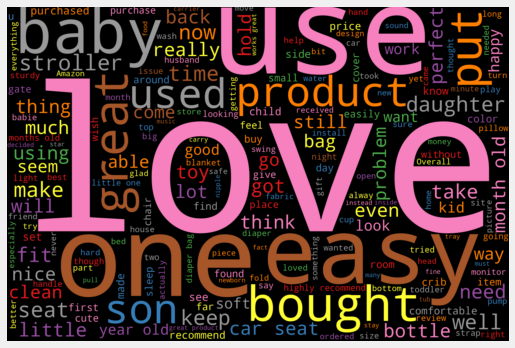

In [15]:
wordcloud = WordCloud(stopwords=stopwords,width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set1').generate(text_positive)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
neutral_df = df[(df.rating == 3)]
len(neutral_df)

16705

In [17]:
text_neutral = " ".join(str(review) for review in neutral_df.review)

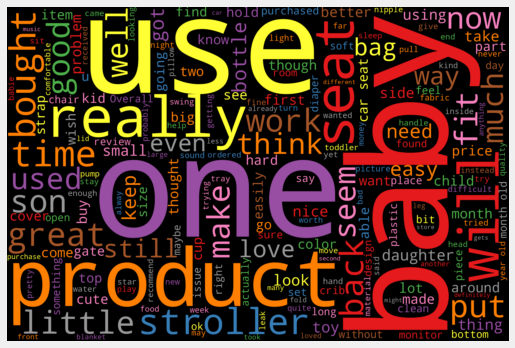

In [18]:
wordcloud = WordCloud(stopwords=stopwords,width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set1').generate(text_neutral)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
negative_df = df[(df.rating == 1) | (df.rating == 2)]
len(negative_df)

26361

In [20]:
text_negative = " ".join(str(review) for review in negative_df.review)

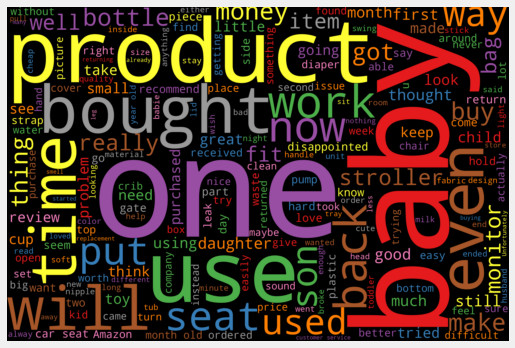

In [21]:
wordcloud = WordCloud(stopwords=stopwords,width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set1').generate(text_negative)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Number of Reviews')

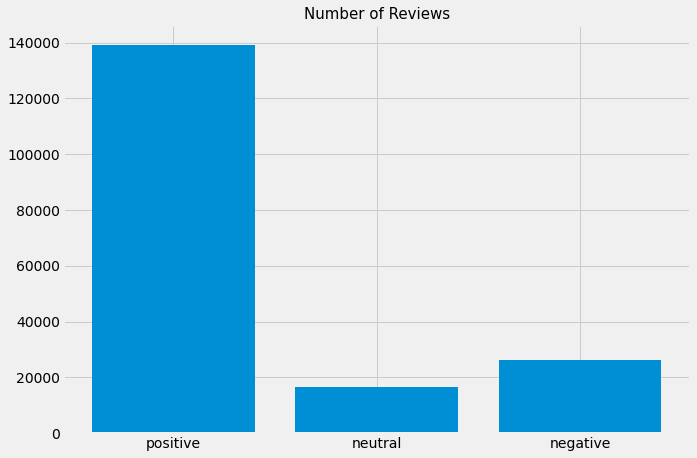

In [22]:
sentiment = ['positive', 'neutral', 'negative']
number = [len(positive_df), len(neutral_df), len(negative_df)]

fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(x= sentiment, height = number)
ax.set_title("Number of Reviews", fontsize = 15)

In [23]:
import pandas as pd  
import numpy as np  
import re  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import *
stemmer = PorterStemmer()  

def review_to_words(raw_review):  
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)   
    words = letters_only.lower().split()  
    stops = set(stopwords.words("english"))   
    meaningful_words = [w for w in words if not w in stops] 
    singles = [stemmer.stem(word) for word in meaningful_words]
    return( " ".join( singles ))  
  
processed_wmn = [review_to_words(str(text)) for text in df.review]  

In [24]:
def build_corpus(data):  
    "Creates a list of lists containing words from each sentence"  
    corpus = []  
    for sentence in data:  
        word_list = sentence.split(" ")  
        corpus.append(word_list)   
    return corpus  
  
corpus = build_corpus(processed_wmn)

In [25]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, window=5, min_count=1000, workers=4)  


In [26]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(50, 50)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

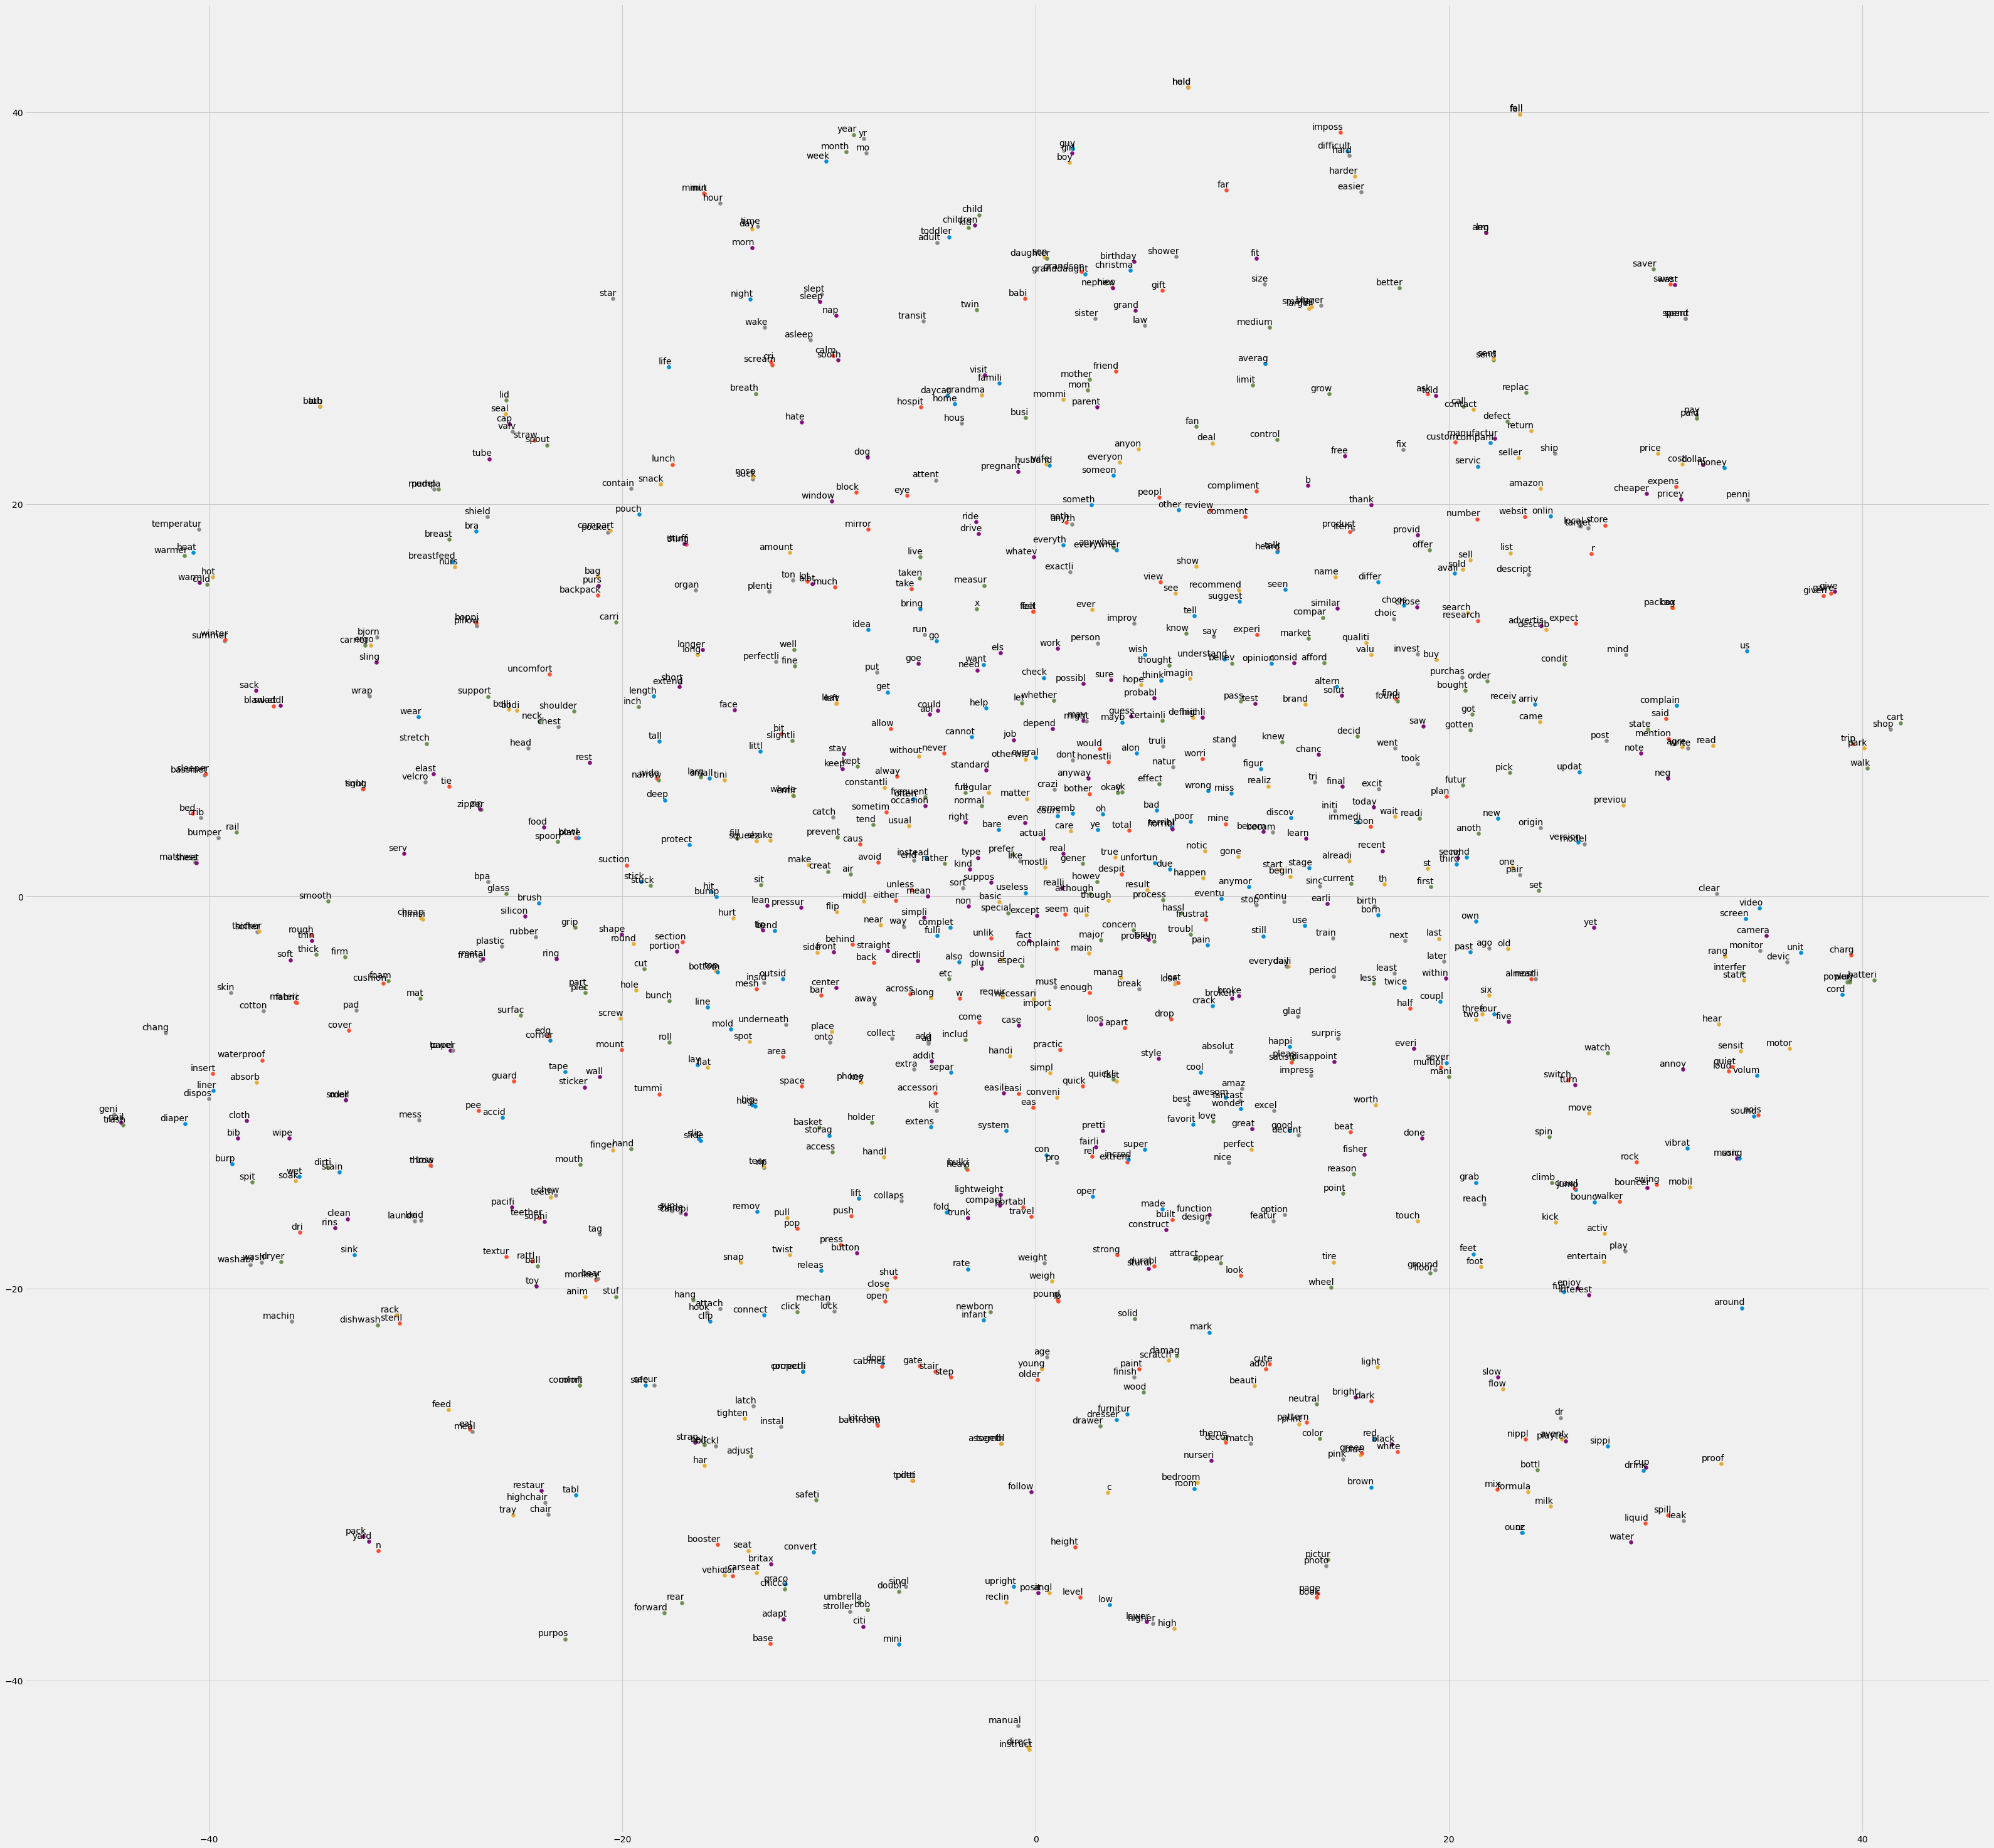

In [27]:
from sklearn.manifold import TSNE
tsne_plot(model)